In [32]:
import av
import numpy as np
import matplotlib.pyplot as plt
import pims
import trackpy
import trackpy as tp
from pims import ImageSequence
from Particledrop import Landing_Flashes

In [33]:
def trackpy_movie(movie, size, mmass):
    nf = movie.shape[0]
    f1 = trackpy.batch(movie[:,:,:], size, minmass=5, invert=False, processes='auto')
    t = trackpy.link(f1, 5, memory=0)
    
    t1 = trackpy.filter_stubs(t, 3)

    t2 = t1.rename(columns={'frame':'Frame'})
#     particles = t2['particle'].nunique()
#     print('Unique particles found:', + particles)
    
    # t2.groupby('Frame')['particle'].nunique().plot(kind='line')
    # plt.yticks(np.arange(0, particles+1, 5.0))
    # plt.xticks(np.arange(0, nf+1, 10.0))
    # plt.title('Number of landed particles over the series of frames')
    # plt.xlabel('Frame number')
    # plt.ylabel('Number of particles')
    # plt.grid()
    # plt.show()
    
    nparticles = []
    frames = np.arange(0,nf,1)

    for i in range(nf):
        temp = t2.loc[t2['Frame'] == i]
        nparticles.append(len(temp))

    plt.figure()
    plt.step(frames,nparticles)
    plt.yticks(np.arange(0, max(nparticles)+1, 2.0))
    plt.xticks(np.arange(0, nf+1, 5.0))
    plt.title('Stepfunction number of landed particles over the series of frames')
    plt.xlabel('Frame number')
    plt.ylabel('Number of particles')
    plt.grid()
    plt.show()
    
    t_hist = t2.drop_duplicates(subset=['particle'])
    plt.title('Found Mass Histogram')
    plt.hist(t_hist['mass'])
    plt.show()
    
#     plt.figure()
#     trackpy.annotate(t2[t2['Frame'] == nf-1], movie[nf-1]);
    
#     return t2, t_hist
    return

In [48]:
plt.rcParams['figure.figsize'] = (10, 10)

In [49]:
video = r"E:\Ingmar\Ingmar\26072022\BFsetup\26072022\300nmlatex_1_to_20000_00002.avi"

In [50]:
container = av.open(video)

for frame in container.decode(video=0):
    frame.to_image().save('Frames1to20000_02/frame%d.jpg' % frame.index)
    frame.to_image()

In [51]:
images = ImageSequence('Frames1to20000_02/frame*.jpg')
length = len(images)
print(length)

601


In [52]:
@pims.pipeline
def gray(image):
    return image[:, :, 1]  # Take just the green channel


frames1 = gray(pims.open('Frames1to20000_02/*.jpg'))

In [53]:
frames1
nf1 = len(frames1)

Frame([[32, 47,  4, ...,  7, 44,  4],
       [ 0,  0,  0, ..., 11,  0,  0],
       [ 0, 14,  0, ..., 95, 66,  0],
       ...,
       [31,  4,  0, ...,  0,  7,  0],
       [ 0, 42, 82, ...,  0,  3,  6],
       [ 0,  6,  0, ...,  5,  0,  3]], dtype=uint8)
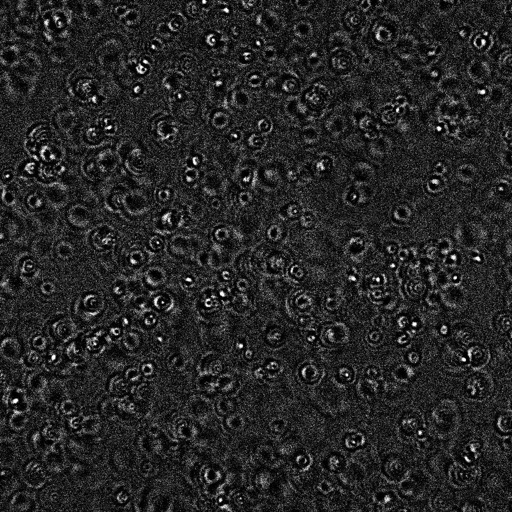

In [54]:
frames1[525]

In [81]:
overview1 = tp.locate(frames1[525], 7, minmass=700, separation=15)

In [82]:
overview1

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
17,17.582385,451.875804,887.315332,1.876968,0.103831,64.979055,5480.0,0.022370,525
31,28.037059,360.532353,746.381031,1.911575,0.400614,57.076197,3424.0,0.036502,525
57,45.903213,118.862069,1120.449643,1.865690,0.131433,72.003817,5098.0,0.024104,525
65,50.011784,353.840386,819.701992,1.672424,0.080178,78.150484,2972.0,0.042389,525
89,63.063107,437.071602,723.550553,1.624300,0.257769,69.808579,3082.0,0.040788,525
...,...,...,...,...,...,...,...,...,...
1486,947.418130,922.094618,774.919130,1.573686,0.194135,83.858104,2599.0,0.048897,525
1490,950.828681,410.500000,912.341049,1.861028,0.156004,61.905721,4824.0,0.025523,525
1555,995.286853,235.581175,881.607712,1.888711,0.187140,58.393340,4226.0,0.029286,525
1560,996.376971,480.873387,918.926764,1.510593,0.055562,100.102868,3012.0,0.041793,525


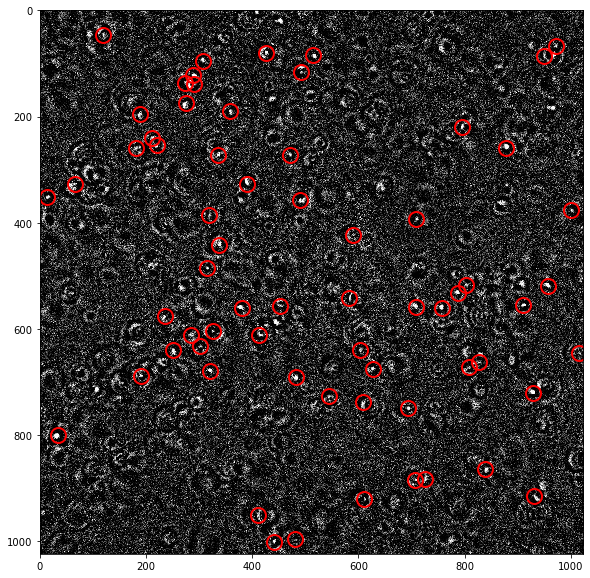

66


In [57]:
tp.annotate(overview1, frames1[525]);
print(len(overview1['mass']))

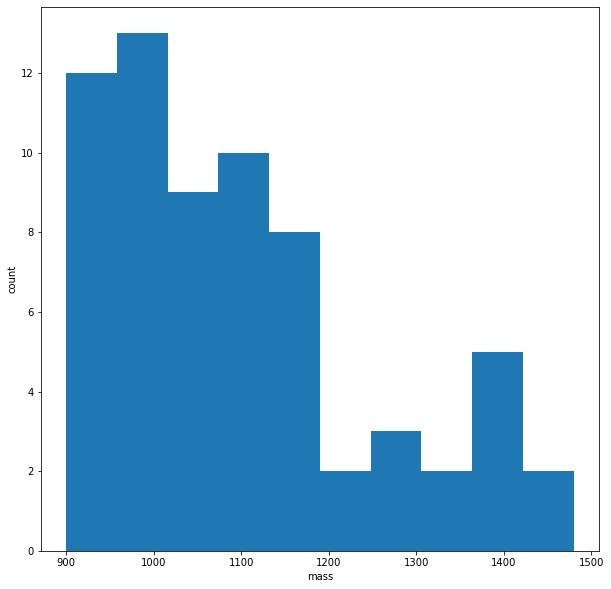

In [58]:
fig, ax = plt.subplots()
ax.hist(overview1['mass'], bins=10)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

In [74]:
f = tp.batch(frames1[:], 7, minmass=700, maxsize=1.9, noise_size=1.2, separation=15)

In [75]:
tp.quiet()  # Turn off progress reports for best performance
t = tp.link(f, 6, memory=2, )

In [76]:
t1 = tp.filter_stubs(t, 5)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 14521
After: 1537


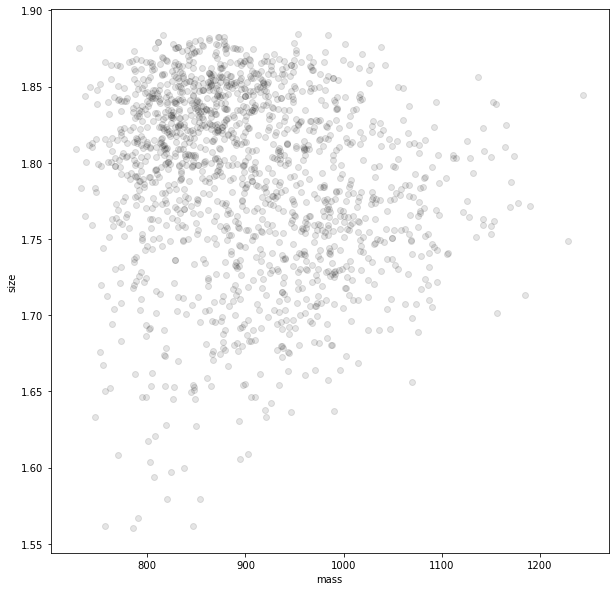

In [77]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

In [78]:
t2 = t1[((t1['mass'] > 750) & (t1['size'] < 2.6) &
         (t1['ecc'] < 0.5))]

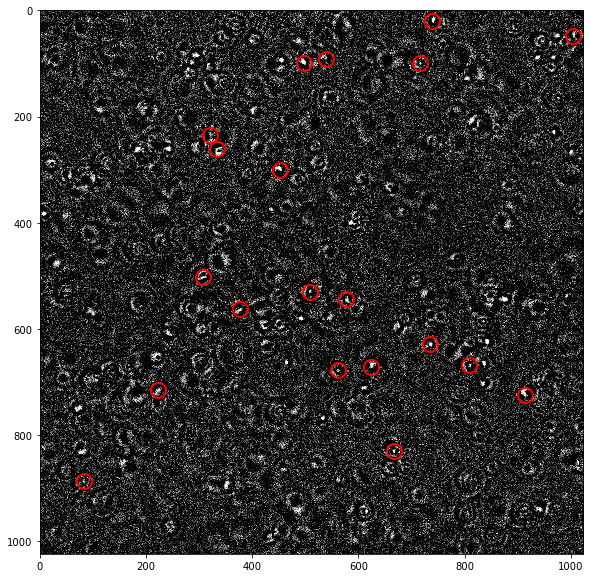

In [79]:
plt.figure()
tp.annotate(t2[t2['frame'] == 366], frames1[366]);

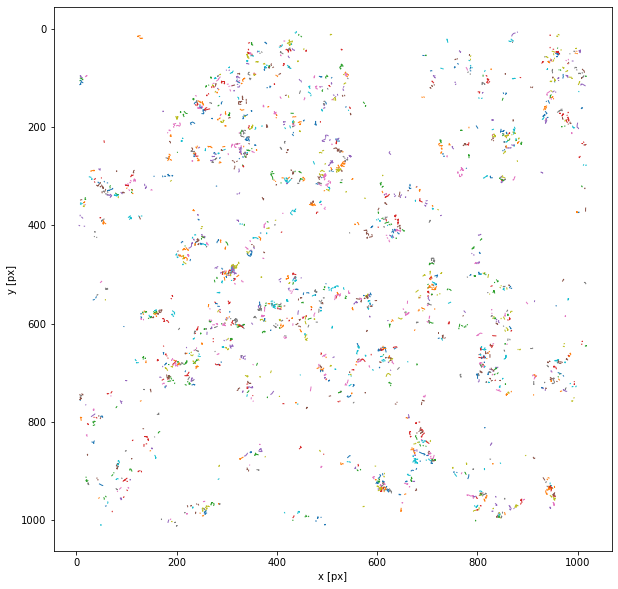

In [80]:
plt.figure()
tp.plot_traj(t2);

In [68]:
startframe = 0
endframe = nf1
startframe2 = 1  # +1 for accounting for the moving average
endframe2 = endframe-startframe

bgcorrected2 = frames1[startframe2:endframe2] - np.mean([frames1[startframe2-1:endframe2-1]])

print(bgcorrected2.shape)  # to check the shape of the array(frames,x,y)

(600, 1024, 1024)


In [69]:
h = tp.batch(bgcorrected2[:], 7)

In [70]:
h

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,3.188612,881.955516,238.141565,1.689933,0.116628,25.848106,422.092658,0.058872,0
1,3.734873,10.441144,385.179151,1.532917,0.130997,52.119951,605.092658,0.051668,0
2,3.869757,160.222958,191.953966,1.500552,0.139526,36.017852,-98.907342,0.097625,0
3,4.193902,311.067073,347.466340,1.539718,0.099705,49.577514,549.092658,0.053678,0
4,4.482633,351.219378,231.785473,1.458757,0.119349,33.051676,190.092658,0.071513,0
...,...,...,...,...,...,...,...,...,...
3368619,1019.992322,523.800384,225.866828,1.571092,0.482666,29.479740,-177.907342,0.101081,599
3368620,1019.482857,564.260000,151.733953,1.628321,0.259080,18.208074,-302.907342,0.121461,599
3368621,1020.549107,660.813988,291.329191,1.712176,0.356860,36.416149,384.092658,0.057616,599
3368622,1019.787659,784.542650,477.745191,1.703525,0.404062,48.121340,1083.092658,0.037539,599
